# Multiclass classification of Iris dataset using decision tree

## imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
import sys
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

from models.decision_tree import DecisionTree

## Data Preprocessing

In [ ]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Training set size: 120 samples
Test set size: 30 samples
Number of features: 4
Number of classes: 3


In [6]:
# Standardization using numpy (Z-score normalization)
# Formula: (X - mean) / std
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

# Add small epsilon to avoid division by zero
epsilon = 1e-8
train_std = np.where(train_std == 0, epsilon, train_std)

X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std


## Model training

In [12]:
dt_model = DecisionTree(max_depth=3, min_samples_split=2)
dt_model.fit(X_train, y_train)

# 3. Predict and Evaluate
y_pred = dt_model.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print(f"Decision Tree Test Accuracy: {accuracy * 100:.2f}%")

# 4. Check Feature Importance
print("\nFeature Importance :")
for name, importance in zip(iris.feature_names, dt_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

Decision Tree Test Accuracy: 96.67%

Feature Importance :
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.7143
petal width (cm): 0.2857


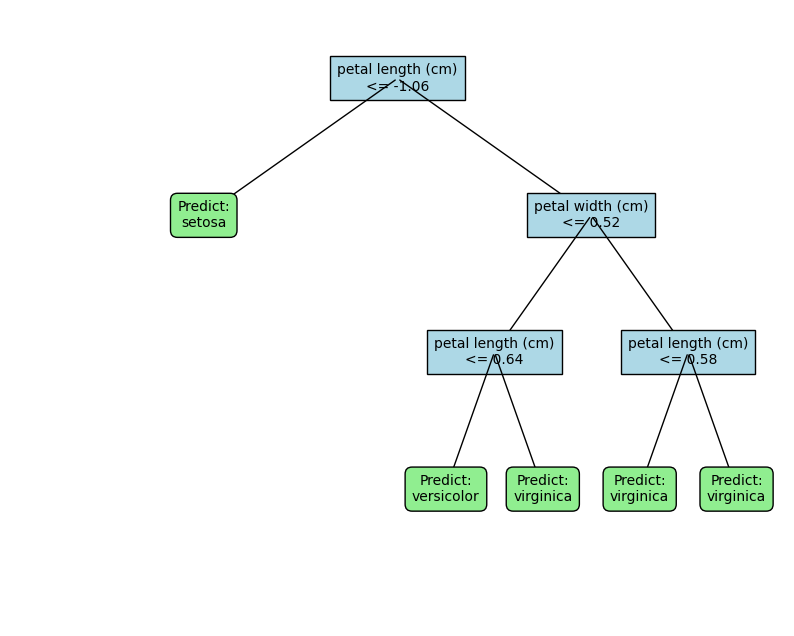

In [ ]:
def plot_tree(node, feature_names, class_names, ax=None, x=0, y=0, dx=1, dy=1):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_axis_off()
        ax.set_xlim(-2, 2)
        ax.set_ylim(-dy * (dt_model.max_depth + 1), 0.5)

    if node["type"] == "leaf":
        # Draw a leaf node (rounded box or different color)
        label = f"Predict:\n{class_names[node['value']]}"
        ax.text(x, y, label, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", edgecolor="black"),
                ha='center', va='center', fontsize=10)
    else:
        # Draw a decision node
        feat = feature_names[node['feature']]
        thresh = node['threshold']
        label = f"{feat}\n<= {thresh:.2f}"
        
        ax.text(x, y, label, bbox=dict(boxstyle="square,pad=0.5", facecolor="lightblue", edgecolor="black"),
                ha='center', va='center', fontsize=10)

        # Calculate positions for children
        new_dx = dx / 2
        left_x, left_y = x - dx, y - dy
        right_x, right_y = x + dx, y - dy

        # Draw lines to children
        ax.annotate("", xy=(left_x, left_y), xytext=(x, y), arrowprops=dict(arrowstyle="->"))
        ax.annotate("", xy=(right_x, right_y), xytext=(x, y), arrowprops=dict(arrowstyle="->"))

        # Recurse
        plot_tree(node["left"], feature_names, class_names, ax, left_x, left_y, new_dx, dy)
        plot_tree(node["right"], feature_names, class_names, ax, right_x, right_y, new_dx, dy)

# Usage:
plot_tree(dt_model.tree, iris.feature_names, iris.target_names)
plt.show()